# Project: TMDB 5000 Movies Dataset Investigate
### Table of Contents
- [Introduction](#Introduction)
- [Data Wrangling](#Data Wrangling)
- [Exploratory Data Analysis](# Exploratory Data Analysis)
- [Conclusions](#Conclusions)

# Introduction

## Dataset Description

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. The data is in two sets, the first one is the movies dataset while the second one is the credits datasets

columns descriptions:

- id: the unique identifier for each movie.
- imdb_id: the unique identifier for each movie on IMDB website.
- popularity:popularity for each movie.
- budget: Movie budget.
- revenue: Movie revenue.
- original_title: Movie Title.
- cast: Movie cast.
- homepage: Movie webpage link.
- director: Movie director.
- tagline: Movie tagline.
- keywords:Movie keywords.
- overview: Movie overview.
- runtime: Movie run times.
- genres: Movie genres.
- production_companies: Movie production
- release_date: Movie release date (month/day/year).
- vote_count: Movie vote count.
- vote_average: Movie vote average.
- release_year:Movie release year.
- casts: the actors in the movie
- crew: the people who are involved in the making of the movies

## Questions:

    1) What kinds of properties are associated with movies that have high revenues?
    2) How does the budget relate to Revenue?
    3) What are the characteristics of popular movies?
    4) Which is the top 10 highest budget movies
    5) Which is the top 10 higest revenue movies
    6) Which is the top 10 most rated movies
    7) Which is the top 10 grossing movies
    8) Which is the most failed movies above 100m
    9) Which is the top 10 highest runtime movies? 
    10) Which gender is most used?



Import needed libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import ast

In [4]:
#Load datsets
movies = pd.read_csv('tmdb_5000_movies.csv')
credits = pd.read_csv('tmdb_5000_credits.csv')

In [5]:
#Inspect datasets
movies.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


In [6]:
credits.head(1)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


Assess datasets

In [7]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [8]:
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


In [9]:
movies.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [10]:
movies.shape

(4803, 20)

In [11]:
credits.shape

(4803, 4)

## Data Wrangling

- Gather the data from Dataset and investigate it to understand more details about it.
- Assess data to identify any issues with data types, structure, or quality.
- Clean data by changing data types, replacing values, removing unnecessary data and modifying Dataset for easy and fast analysis.
- homepage column has empty_value
- tagline column has empty_value
- runtime column has empty_value
- release_date column data type is string not datetime.
- I add new column ["profit"] to calculate every movie gross.
- I add new column release year to replace release date.
- I remove unnecessary columns 'homepage', 'keywords', 'overview', 'spoken_languages', 'status', 'tagline', 'title_x', 'movie_id', 'title_y', 'vote_count','id'
- The status contains ['Released', 'Post Production', 'Rumored'] array, changed the data to 'released' only.  

In [12]:
movies.status.unique()

array(['Released', 'Post Production', 'Rumored'], dtype=object)

Drop all other rows that the status is not Released

In [13]:
movies = movies.query('status == "Released"')

In [14]:
movies.shape

(4795, 20)

In [15]:
#make a copy of the datsets for cleaning
movies2 = movies.copy()

In [16]:
#merged both datsets
merged = movies.merge(credits, left_on='id', right_on='movie_id')
merged.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title_x,vote_average,vote_count,movie_id,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [17]:
#assess the merged data
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4795 entries, 0 to 4794
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4795 non-null   int64  
 1   genres                4795 non-null   object 
 2   homepage              1709 non-null   object 
 3   id                    4795 non-null   int64  
 4   keywords              4795 non-null   object 
 5   original_language     4795 non-null   object 
 6   original_title        4795 non-null   object 
 7   overview              4792 non-null   object 
 8   popularity            4795 non-null   float64
 9   production_companies  4795 non-null   object 
 10  production_countries  4795 non-null   object 
 11  release_date          4794 non-null   object 
 12  revenue               4795 non-null   int64  
 13  runtime               4793 non-null   float64
 14  spoken_languages      4795 non-null   object 
 15  status               

Clean Data

In [18]:
#check data for null values
merged.isna().sum()

budget                     0
genres                     0
homepage                3086
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  838
title_x                    0
vote_average               0
vote_count                 0
movie_id                   0
title_y                    0
cast                       0
crew                       0
dtype: int64

In [19]:
#drop all null values
merged.dropna(inplace=True)
merged.isna().sum()

budget                  0
genres                  0
homepage                0
id                      0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
tagline                 0
title_x                 0
vote_average            0
vote_count              0
movie_id                0
title_y                 0
cast                    0
crew                    0
dtype: int64

In [20]:
#drop columns that are not useful
merged.drop(['homepage', 'keywords', 'overview', 'spoken_languages', 'status', 'tagline', 'title_x', 'movie_id', 'title_y', 'vote_count','id'], axis=1, inplace=True)

In [21]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1492 entries, 0 to 4793
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                1492 non-null   int64  
 1   genres                1492 non-null   object 
 2   original_language     1492 non-null   object 
 3   original_title        1492 non-null   object 
 4   popularity            1492 non-null   float64
 5   production_companies  1492 non-null   object 
 6   production_countries  1492 non-null   object 
 7   release_date          1492 non-null   object 
 8   revenue               1492 non-null   int64  
 9   runtime               1492 non-null   float64
 10  vote_average          1492 non-null   float64
 11  cast                  1492 non-null   object 
 12  crew                  1492 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 163.2+ KB


In [22]:
#Inspect new merged data
merged.describe()

,budget,popularity,revenue,runtime,vote_average
count,1.492000e+03,1492.000000,1.492000e+03,1492.000000,1492.000000
mean,4.592610e+07,35.773116,1.551122e+08,108.670912,6.274196
std,5.369703e+07,48.214887,2.409185e+08,19.378565,0.969459
min,0.000000e+00,0.023681,0.000000e+00,0.000000,0.000000
25%,7.500000e+06,11.633720,9.473596e+06,95.000000,5.800000
50%,2.700000e+07,25.281258,6.258280e+07,106.000000,6.300000
75%,6.325000e+07,45.150375,1.860821e+08,120.000000,6.900000
max,3.800000e+08,875.581305,2.787965e+09,201.000000,8.400000


In [23]:
#check the correlations between the columns
merged.corr()

,budget,popularity,revenue,runtime,vote_average
budget,1.000000,0.454771,0.744793,0.369292,0.088710
popularity,0.454771,1.000000,0.593536,0.295621,0.301305
revenue,0.744793,0.593536,1.000000,0.381417,0.251516
runtime,0.369292,0.295621,0.381417,1.000000,0.414724
vote_average,0.088710,0.301305,0.251516,0.414724,1.000000


In [24]:
#rename title and language columns
merged = merged.rename(columns={"original_title": "title", "original_language": "language"})

In [25]:
#check data types
merged.dtypes

budget                    int64
genres                   object
language                 object
title                    object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
vote_average            float64
cast                     object
crew                     object
dtype: object

In [26]:
merged.head(1)

,budget,genres,language,title,popularity,production_companies,production_countries,release_date,revenue,runtime,vote_average,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,Avatar,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,7.2,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [27]:
merged.shape

(1492, 13)

In [28]:
#inspect the language column
merged['language'].value_counts()

en    1435
fr       9
es       9
zh       7
ja       5
de       5
hi       4
ko       3
pt       2
id       2
cn       1
th       1
ru       1
nl       1
nb       1
af       1
ar       1
it       1
no       1
el       1
fa       1
Name: language, dtype: int64

Change the date column to only year

In [29]:
#add release year column
merged['release_year'] = pd.DatetimeIndex(merged['release_date']).year
merged['release_year']

0       2009
1       2007
2       2015
3       2012
4       2012
        ... 
4765    1994
4773    2013
4783    2007
4788    2004
4793    2012
Name: release_year, Length: 1492, dtype: int64

In [30]:
#drop the release date column
merged.drop(['release_date'], axis=1, inplace=True)

- The Genre, Production Company and Production Country columns all lists nested in strings
- The function below turns strings into proper lists, and stores the names in the lists only

In [31]:
def get_clean_column(x):
    clean_genres = []
    for i in ast.literal_eval(x):
        clean_genres.append(i['name'])
    return clean_genres

In [32]:
# Clean the genre, production Company and production Country columns 

merged['genres'] = merged['genres'].apply(lambda x: get_clean_column(x))
merged['production_companies'] = merged['production_companies'].apply(lambda x: get_clean_column(x))
merged['production_countries'] = merged['production_countries'].apply(lambda x: get_clean_column(x))

In [33]:
# Only interested in the first character which is the main character) in the list
# Only getting character name, real name and gender of the cast member

def get_clean_cast(x):
    clean_cast = []
    for i in ast.literal_eval(x)[:1]:
        clean_cast_dic = {'name': i['name'],                        
                        'gender': i['gender']}
        clean_cast.append(clean_cast_dic)
    return clean_cast

In [34]:
# Clean the cast 
merged['cast'] = merged['cast'].apply(lambda x: get_clean_cast(x))

In [35]:
# Crew column changed to show only the number of crew members
merged['crew'] = merged['crew'].apply(lambda x: len(ast.literal_eval(x)))

In [36]:
# Get lead character's gender

def get_gender(x):
    if x:
        if x[0]['gender'] == 1:
            return 'Female'
        elif x[0]['gender'] == 2:
            return 'Male'
        else:
            return 'Neither'
    else:
        return 'Neither'

In [37]:
merged['lead_gender'] = merged['cast'].apply(lambda x: get_gender(x))
merged[['title', 'lead_gender']].head(30)

,title,lead_gender
0,Avatar,Male
1,Pirates of the Caribbean: At World's End,Male
2,Spectre,Male
3,The Dark Knight Rises,Male
4,John Carter,Male
5,Spider-Man 3,Male
6,Tangled,Male
7,Avengers: Age of Ultron,Male
8,Harry Potter and the Half-Blood Prince,Male
9,Batman v Superman: Dawn of Justice,Male


In [38]:
merged.head(1)

,budget,genres,language,title,popularity,production_companies,production_countries,revenue,runtime,vote_average,cast,crew,release_year,lead_gender
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",en,Avatar,150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",2787965087,162.0,7.2,"[{'name': 'Sam Worthington', 'gender': 2}]",153,2009,Male


In [39]:
#Save the datset after it has beeb cleaned
merged.to_csv('cleaned_df.csv', index=False)

## Exploratory Data Analysis

In [40]:
#Load clean merged dataset
cleaned_df = pd.read_csv('cleaned_df.csv')

Create a profit column to know the grossing movies

In [41]:
#add the profit column to the table
cleaned_df['profit'] = cleaned_df['revenue'] - cleaned_df['budget']

In [42]:
#check if the new column is there
cleaned_df.head(1)
cleaned_df.describe()

,budget,popularity,revenue,runtime,vote_average,crew,release_year,profit
count,1.492000e+03,1492.000000,1.492000e+03,1492.000000,1492.000000,1492.000000,1492.000000,1.492000e+03
mean,4.592610e+07,35.773116,1.551122e+08,108.670912,6.274196,36.780831,2007.547587,1.091861e+08
std,5.369703e+07,48.214887,2.409185e+08,19.378565,0.969459,37.520693,8.326246,2.040953e+08
min,0.000000e+00,0.023681,0.000000e+00,0.000000,0.000000,0.000000,1937.000000,-1.657101e+08
25%,7.500000e+06,11.633720,9.473596e+06,95.000000,5.800000,12.000000,2006.000000,0.000000e+00
50%,2.700000e+07,25.281258,6.258280e+07,106.000000,6.300000,22.000000,2009.000000,3.139374e+07
75%,6.325000e+07,45.150375,1.860821e+08,120.000000,6.900000,49.000000,2012.000000,1.261194e+08
max,3.800000e+08,875.581305,2.787965e+09,201.000000,8.400000,435.000000,2017.000000,2.550965e+09


   ### Question 1) What kinds of properties are associated with movies that have high revenues?

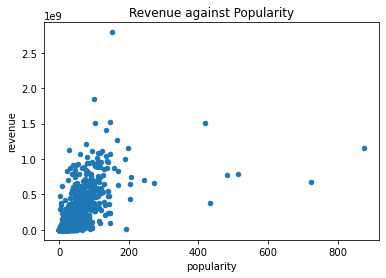

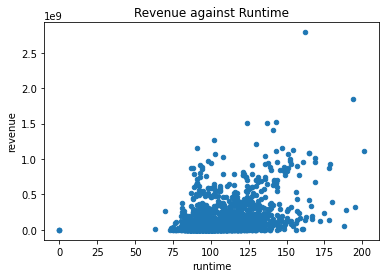

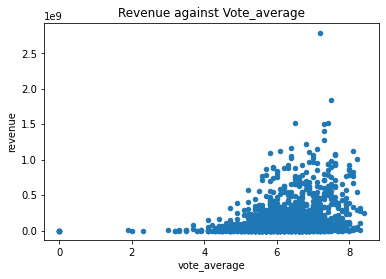

In [46]:
# get a chart of revenue against other columns
cleaned_df.plot(x="popularity", y="revenue", title='Revenue against Popularity', kind="scatter");
cleaned_df.plot(x="runtime", y="revenue", title='Revenue against Runtime', kind="scatter");
cleaned_df.plot(x="vote_average", y="revenue", title='Revenue against Vote_average', kind="scatter");

From the visual exploration above it is seen that the high revenue movies are popular, have average runtime and has the  left skewed vote. 

  ### Question  2) How does the budget relate to Revenue?


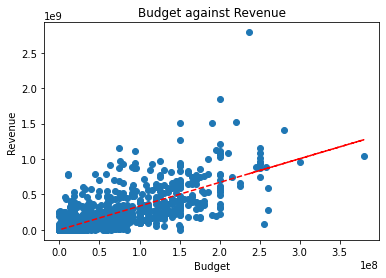

In [52]:
#explore the budget and revenue chart
x = cleaned_df['budget']
y = cleaned_df['revenue']
plt.scatter(x, y)
plt.title("Budget against Revenue")
plt.xlabel("Budget")
plt.ylabel("Revenue")
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.show()

The visual above shows there is a positve correleration between the budget and the venue. the higer the budget, the higher the revenue.

 ### Question 3) What are the characteristics of popular movies?

In [48]:
# create the title against popularity table
top_10 = cleaned_df.nlargest(10,"popularity")[["title","popularity"]]
top_10

,title,popularity
314,Minions,875.581305
76,Interstellar,724.247784
428,Deadpool,514.569956
75,Guardians of the Galaxy,481.098624
101,Mad Max: Fury Road,434.278564
24,Jurassic World,418.708552
146,Pirates of the Caribbean: The Curse of the Bla...,271.972889
67,Dawn of the Planet of the Apes,243.791743
147,The Hunger Games: Mockingjay - Part 1,206.227151
71,Big Hero 6,203.734590


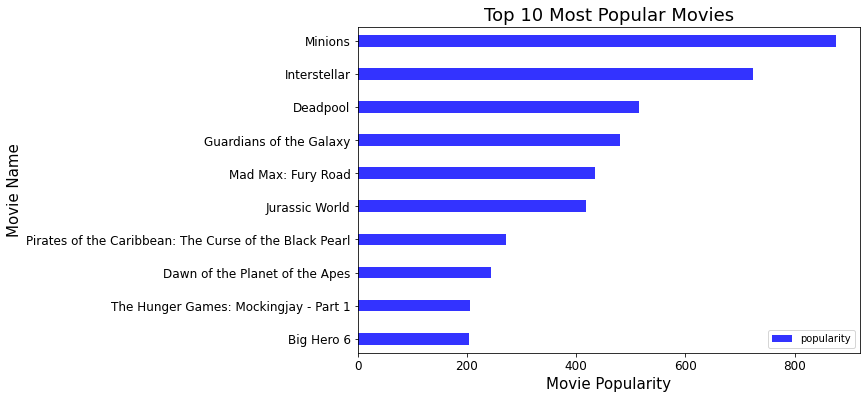

In [51]:
# get the chart of the title against popularity
top_10.groupby("title")["popularity"].sum().sort_values().plot(kind="barh",
                                                                                 rot = 0,
                                                                                 width = 0.35,
                                                                                 color=["b"],
                                                                                 alpha = 0.8,
                                                                                 fontsize = 12,
                                                                                 figsize=(9,6),
                                                                                 )

plt.ylabel("Movie Name",fontsize=15, color="k")
plt.xlabel("Movie Popularity",fontsize=15, color="k")
plt.legend(loc="lower right")
plt.title("Top 10 Most Popular Movies", fontsize=18, color="k");

In [54]:
import seaborn as sns

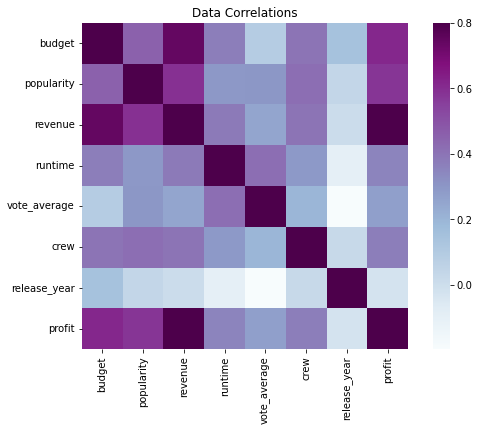

In [57]:
# get the correlation matrix of the columns
matrix = cleaned_df.corr() 
f, ax = plt.subplots(figsize=(9, 6)) 
ax.set_title('Data Correlations')
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

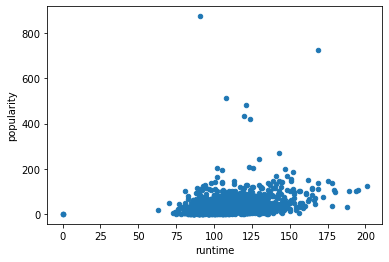

In [58]:
# get the plot of runtime against popularity
cleaned_df.plot(x="runtime", y="popularity", kind="scatter");

The visual above showed that the popular movies have average runtime, high revenue and high budget.

### Question 4) Which is the top 10 highest budget movies

In [59]:
# a view of title agaist the budget 
top_10 = cleaned_df.nlargest(10,"budget")[["title","budget"]]
top_10

,title,budget
15,Pirates of the Caribbean: On Stranger Tides,380000000
1,Pirates of the Caribbean: At World's End,300000000
7,Avengers: Age of Ultron,280000000
4,John Carter,260000000
6,Tangled,260000000
5,Spider-Man 3,258000000
12,The Lone Ranger,255000000
3,The Dark Knight Rises,250000000
8,Harry Potter and the Half-Blood Prince,250000000
9,Batman v Superman: Dawn of Justice,250000000


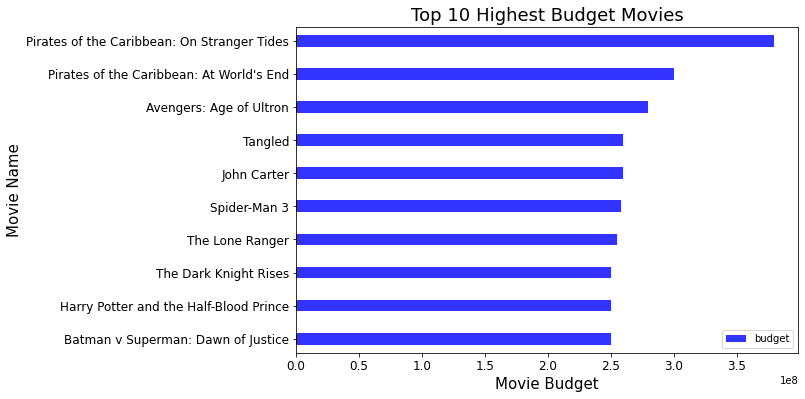

In [61]:
#a graph of title against the budget
top_10.groupby("title")["budget"].sum().sort_values().plot(kind="barh",
                                                                                 rot = 0,
                                                                                 width = 0.35,
                                                                                 color=["b"],
                                                                                 alpha = 0.8,
                                                                                 fontsize = 12,
                                                                                 figsize=(9,6),
                                                                                 )

plt.ylabel("Movie Name",fontsize=15, color="k")
plt.xlabel("Movie Budget",fontsize=15, color="k")
plt.legend(loc="lower right")
plt.title("Top 10 Highest Budget Movies", fontsize=18, color="k");

The top 10 movies with the highest movies are shown in the above visual

### Question 5) Which is the top 10 higest revenue movies

In [62]:
#a view of title against the revenue
top_10 = cleaned_df.nlargest(10,"revenue")[["title","revenue"]]
top_10

,title,revenue
0,Avatar,2787965087
22,Titanic,1845034188
14,The Avengers,1519557910
24,Jurassic World,1513528810
38,Furious 7,1506249360
7,Avengers: Age of Ultron,1405403694
99,Frozen,1274219009
27,Iron Man 3,1215439994
314,Minions,1156730962
23,Captain America: Civil War,1153304495


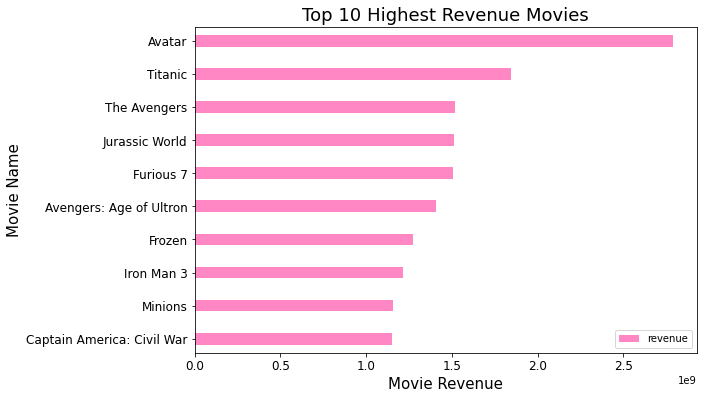

In [63]:
#a graph of title against the revenue
top_10.groupby("title")["revenue"].sum().sort_values().plot(kind="barh",
                                                                                 rot = 0,
                                                                                 width = 0.35,
                                                                                 color=["hotpink"],
                                                                                 alpha = 0.8,
                                                                                 fontsize = 12,
                                                                                 figsize=(9,6),
                                                                                 )

plt.ylabel("Movie Name",fontsize=15, color="k")
plt.xlabel("Movie Revenue",fontsize=15, color="k")
plt.legend(loc="lower right")
plt.title("Top 10 Highest Revenue Movies", fontsize=18, color="k");

Avatar is the movie with the highest revenue, followed by the others in the top 10 list.

### Question 6) Which is the top 10 grossing movies

In [64]:
#a view of title against the profit
top_10 = cleaned_df.nlargest(10,"profit")[["title","profit"]]
top_10

,title,profit
0,Avatar,2550965087
22,Titanic,1645034188
24,Jurassic World,1363528810
38,Furious 7,1316249360
14,The Avengers,1299557910
7,Avengers: Age of Ultron,1125403694
99,Frozen,1124219009
314,Minions,1082730962
222,The Lord of the Rings: The Return of the King,1024888979
27,Iron Man 3,1015439994


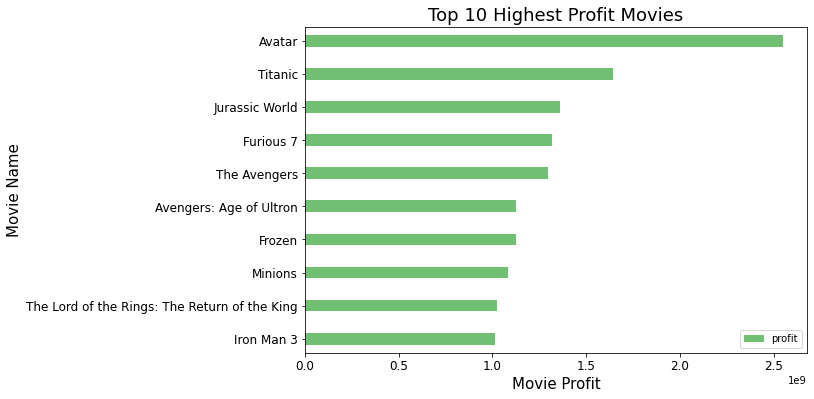

In [65]:
#a graph of title against the profit
top_10.groupby("title")["profit"].sum().sort_values().plot(kind="barh",
                                                                                 rot = 0,
                                                                                 width = 0.35,
                                                                                 color=["#4CAF50"],
                                                                                 alpha = 0.8,
                                                                                 fontsize = 12,
                                                                                 figsize=(9,6),
                                                                                 )

plt.ylabel("Movie Name",fontsize=15, color="k")
plt.xlabel("Movie Profit",fontsize=15, color="k")
plt.legend(loc="lower right")
plt.title("Top 10 Highest Profit Movies", fontsize=18, color="k");

The highest grossing movie is the Avatar and Irom man 3 ends the top 10 list

### Question 7) Which is the top 10 most rated movies

In [66]:
#a graph of title against the vote
top_10 = cleaned_df.nlargest(10,"vote_average")[["title","vote_average"]]
top_10

,title,vote_average
1181,The Godfather,8.4
369,Fight Club,8.3
776,Schindler's List,8.3
915,千と千尋の神隠し,8.3
1295,Whiplash,8.3
54,The Dark Knight,8.2
386,The Green Mile,8.2
783,GoodFellas,8.2
818,The Empire Strikes Back,8.2
1115,American History X,8.2


C:\Users\Gidi\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 21315 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Gidi\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 12392 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Gidi\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 23563 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Gidi\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 12398 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Gidi\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 31070 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Gidi\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 38560 missing from current

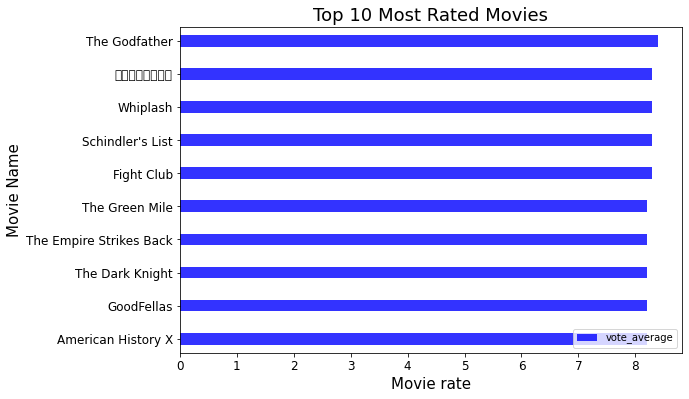

In [67]:
#a graph of title against the vote
top_10.groupby("title")["vote_average"].sum().sort_values().plot(kind="barh",
                                                                                 rot = 0,
                                                                                 width = 0.35,
                                                                                 color=["b"],
                                                                                 alpha = 0.8,
                                                                                 fontsize = 12,
                                                                                 figsize=(9,6),
                                                                                 )

plt.ylabel("Movie Name",fontsize=15, color="k")
plt.xlabel("Movie rate",fontsize=15, color="k")
plt.legend(loc="lower right")
plt.title("Top 10 Most Rated Movies", fontsize=18, color="k");

The chart above showed the top 10 most rated movies by the audience

### Question 8) Which is the most failed movies above 100m

In [68]:
#create a view of top failed movies with highest rating
top_failed = merged.query('budget >= 1.0e+08 and revenue < budget')[['title','release_year', 'production_companies', 'budget','revenue']]

top_failed['revenue_prop'] = top_failed.revenue/top_failed.budget

top_failed.sort_values(by='revenue_prop', inplace=True)
top_failed



,title,release_year,production_companies,budget,revenue,revenue_prop
135,The Wolfman,2010,"[Universal Pictures, Stuber Productions, Relat...",150000000,0,0.000000
141,Mars Needs Moms,2011,[Walt Disney Animation Studios],150000000,38992758,0.259952
13,The Lone Ranger,2013,"[Walt Disney Pictures, Jerry Bruckheimer Films...",255000000,89289910,0.350157
226,How Do You Know,2010,"[Columbia Pictures, Gracie Films, Road Rebel]",120000000,48668907,0.405574
142,Flushed Away,2006,"[Aardman Animations, DreamWorks Animation]",149000000,64459316,0.432613
198,R.I.P.D.,2013,"[Universal Pictures, Original Film, Dark Horse...",130000000,61648500,0.474219
225,Speed Racer,2008,"[Village Roadshow Pictures, Studio Babelsberg,...",120000000,93945766,0.782881
310,In the Heart of the Sea,2015,"[Imagine Entertainment, Spring Creek Productio...",100000000,93820758,0.938208
357,Ben-Hur,2016,"[Paramount Pictures, Metro-Goldwyn-Mayer (MGM)...",100000000,94061311,0.940613
255,Home on the Range,2004,[Walt Disney Pictures],110000000,103951461,0.945013


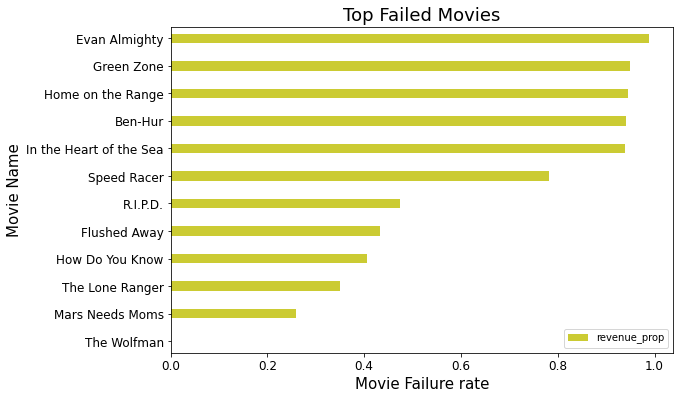

In [69]:
#a graph of top failed movies above 100m budget
top_failed.groupby("title")["revenue_prop"].sum().sort_values().plot(kind="barh",
                                                                                 rot = 0,
                                                                                 width = 0.35,
                                                                                 color=["y"],
                                                                                 alpha = 0.8,
                                                                                 fontsize = 12,
                                                                                 figsize=(9,6),
                                                                                 )

plt.ylabel("Movie Name",fontsize=15, color="k")
plt.xlabel("Movie Failure rate",fontsize=15, color="k")
plt.legend(loc="lower right")
plt.title("Top Failed Movies", fontsize=18, color="k");

It can be seen that it is possible for high budget movies to fail based on revenue, however, this is very low compared to movies that are successful.

### Question 9) Which is the top 10 highest runtime movies? 

In [70]:
#create top 10 runtime
top_10 = cleaned_df.nlargest(10,"runtime")[["title","runtime"]]
top_10

,title,runtime
222,The Lord of the Rings: The Return of the King,201.0
776,Schindler's List,195.0
22,Titanic,194.0
386,The Green Mile,189.0
614,Magnolia,188.0
207,The Wolf of Wall Street,180.0
223,The Lord of the Rings: The Two Towers,179.0
189,The Lord of the Rings: The Fellowship of the Ring,178.0
265,Meet Joe Black,178.0
1181,The Godfather,175.0


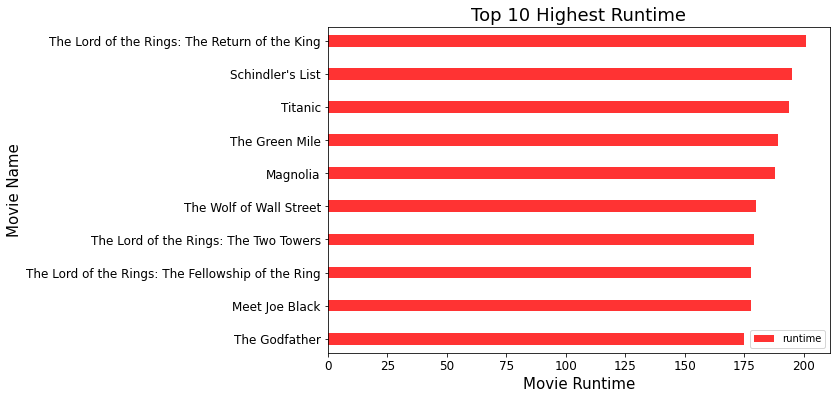

In [71]:
#a graph of top 10 highest runtime
top_10.groupby("title")["runtime"].sum().sort_values().plot(kind="barh",
                                                                                 rot = 0,
                                                                                 width = 0.35,
                                                                                 color=["r"],
                                                                                 alpha = 0.8,
                                                                                 fontsize = 12,
                                                                                 figsize=(9,6),
                                                                                 )

plt.ylabel("Movie Name",fontsize=15, color="k")
plt.xlabel("Movie Runtime",fontsize=15, color="k")
plt.legend(loc="lower right")
plt.title("Top 10 Highest Runtime", fontsize=18, color="k");

The movies that runs the most are shown above

In [72]:
# Explore Male vs Female lead movies (counts and profits)
lead_char = cleaned_df[['title','lead_gender']].groupby('lead_gender').count()
lead_char

,title
lead_gender,
Female,378
Male,1055
Neither,59


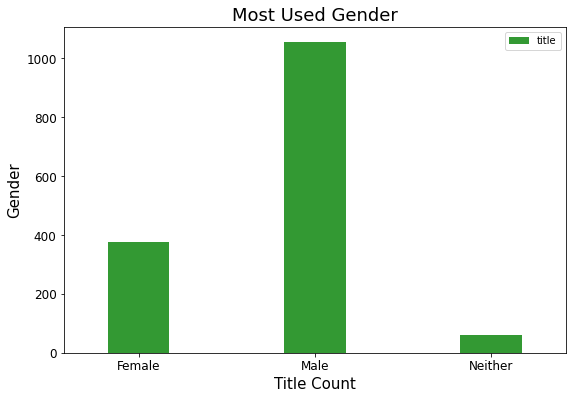

In [77]:
lead_char = cleaned_df[['title','lead_gender']].groupby('lead_gender').count().plot(kind="bar",
                                                                                 rot = 0,
                                                                                 width = 0.35,
                                                                                 color=["g"],
                                                                                 alpha = 0.8,
                                                                                 fontsize = 12,
                                                                                 figsize=(9,6),
                                                                                 )

plt.ylabel("Gender",fontsize=15, color="k")
plt.xlabel("Title Count",fontsize=15, color="k")
plt.legend(loc="upper right")
plt.title("Most Used Gender", fontsize=18, color="k");

In [79]:
# check the year which released highest number of movies using groupby

high_year = cleaned_df.groupby("release_year")["title"].count().sort_values(ascending=False)
top_year = high_year[:10][:]
top_year 

release_year
2011    156
2010    150
2009    135
2012    110
2008    107
2015     93
2007     91
2013     90
2006     81
2014     70
Name: title, dtype: int64

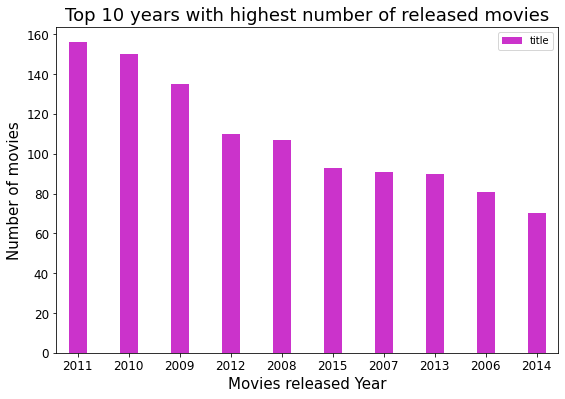

In [80]:
# high_years with most released movies bar chart

top_year.plot(kind="bar",
               rot = 0,
               width = 0.35,
               color=["m"],
               alpha = 0.8,
               fontsize = 12,
               figsize=(9,6),
              )

plt.ylabel("Number of movies",fontsize=15, color="k")
plt.xlabel("Movies released Year",fontsize=15, color="k")
plt.legend(loc="upper right")
plt.title("Top 10 years with highest number of released movies", fontsize=18, color="k");

## Conclusions

    1. I saw that movies with high revenues are mostly commercially successful
    
    2. I also noticed that movies with higher budget mostly gets high revenue
    
    3. The popular movies have normal distribution running time, high revenues and budgets
    
    4. Even though Pirates of the Caribbean: On Stranger Tides is the movie with the highest budget, it's not in the top 10 of the highest grossing movies. The move the highest revenue and grossing is the Avatar. It is the most successful movie in the pack. The Godfather is the people's favorite with the highest ratings.
    
    5. I also found that it is difficult to produce a film with a budget exceeding 100 million and then the film fails commercially.

    6. 2011 is the highest year according to number of released movies.

    7. There is a very strong positive correlation between budget and profit.

    8. There is a strong positive correlation between budget and profit but it's not as strong as correlation with budget.

    9. There is no correlation to consider between runtime and profit.

    10. There is a very strong positive correlation between vote numbers and popularity.

    11. There is a strong positive correlation between vote numbers and profit.
    
    12. The movies with the highest crews have the highest budget, revenue and profit.
    
    13. English is the most spoken language and the USA is the highest production country.

### Limitations

Genres column has multiple values and there is no indication about main genre so we can not be sure from all statistics which depends on genre is accurate or not. It is also not known if popularity oe vote_counts tranlsates to most watched because there is no correlation between the two so it was hard to know the metrics for the popularity. So I cannot find correlation accurately. It was aslso hard to put the production companies in a chart due to the nature of the datasets. even though there is correleration between the popularity anf high budget, I will not call it a causation.